In [178]:
import numpy as np
import matplotlib.pyplot as plt


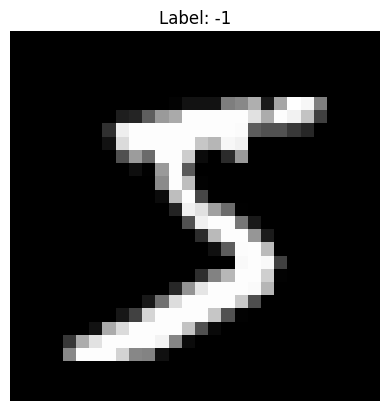

In [179]:

# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)
# Assuming you want to visualize the first image

# Index changed
indicator_labels = (labels-5)*2-1

image_index = 0
image_data = data_matrix[image_index]
selected_label = int(indicator_labels[image_index])
# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off') # Turn off axis
plt.show()

In [180]:
def knn(training_points, training_labels, test_points, test_labels):
    m = training_points.shape[0]
    n = test_points.shape[0]

    # Calculates dot products
    training_dot_training = np.dot(training_points, np.transpose(training_points))
    training_dot_test = np.dot(training_points, np.transpose(test_points))
    test_dot_test = np.dot(test_points, np.transpose(test_points))
    
    # Formula from assignment text
    fst_part = np.outer(np.diag(training_dot_training), np.transpose(np.ones(n)))
    snd_part = 2 * training_dot_test
    trd_part = np.outer(np.transpose(np.ones(m)), np.transpose(np.diag(test_dot_test)))

    # All distances as m x n matrix (from assignment text)
    distances = np.transpose(fst_part - snd_part + trd_part)

    # Sorted indices
    indices = np.argsort(distances)

    # Count the majority vote for all K closest points     
    Y = list(map(lambda x, y: np.sign(np.cumsum((training_labels[x] == y)*2-1)), indices, test_labels))

    # m-vector of average error of K-nn
    return 1 - sum(Y) / n
    

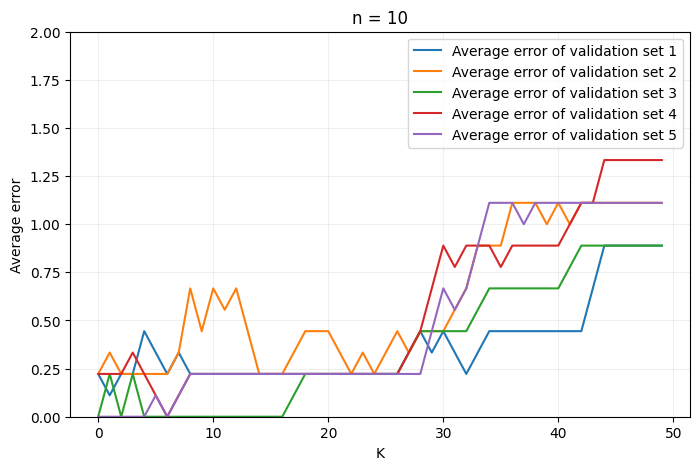

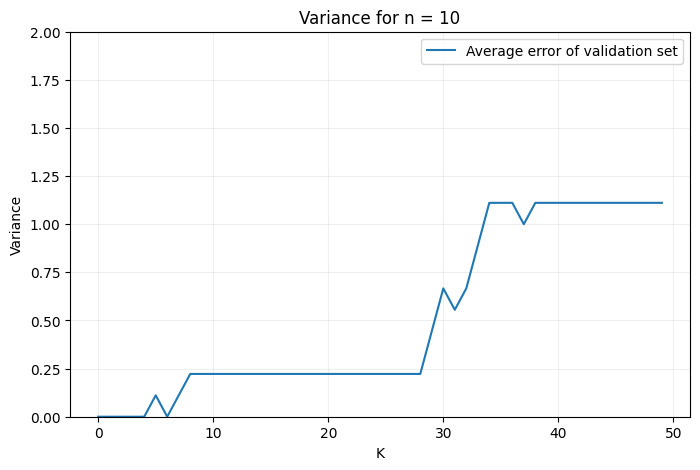

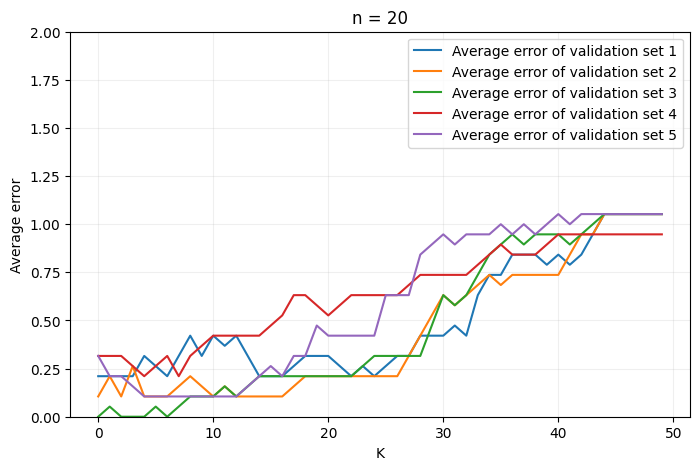

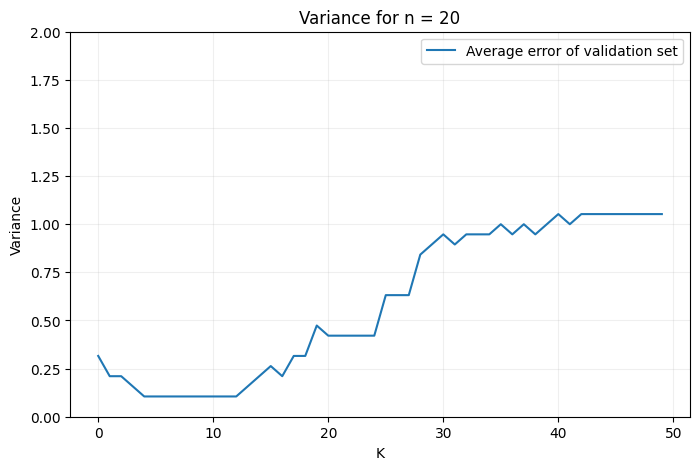

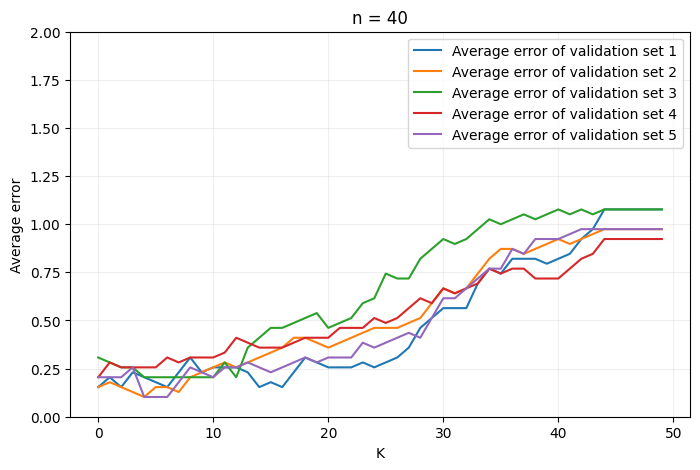

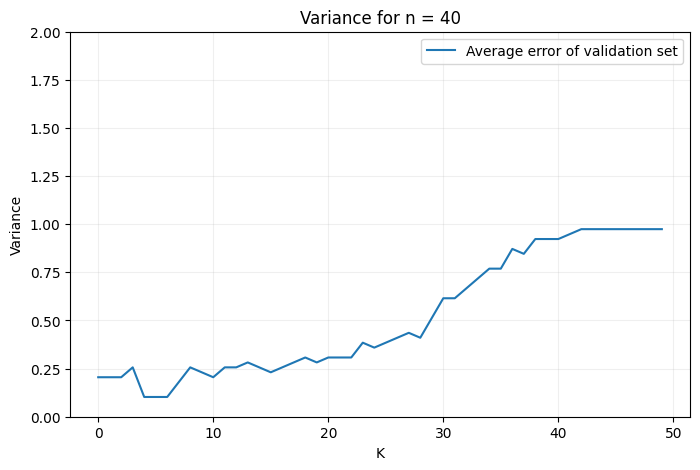

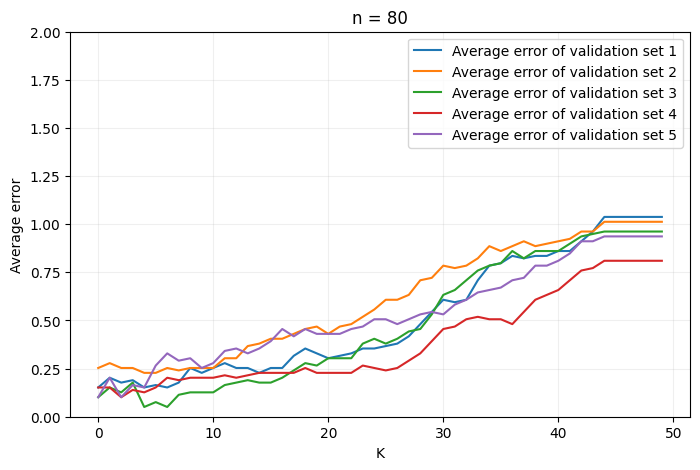

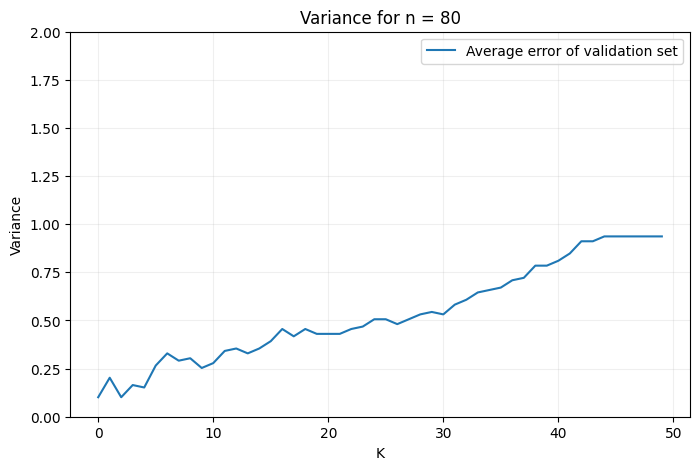

In [181]:
m = 50

n = 80


training_data = data_matrix[:m]
training_labels = indicator_labels[:m]

# testing_data = data_matrix[m+1:m+n+1]
# testing_labels = indicator_labels[m+1:m+n+1]

# print(knn(training_data, training_labels, testing_data, testing_labels))


def validation(data, labels, i, m, n):
    validation_data = data[m + (i - 1) * n + 1 : m + i * n]
    validation_labels = labels[m + (i - 1) * n + 1 : m + i * n]
    return knn(training_data, training_labels, validation_data, validation_labels)

def experiment(data, labels, n):
    x = np.arange(0, m, 1)
    Y = list(map(lambda i : validation(data, labels, i, m, n), range(1, 6)))


    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))

    # Plot in axis, add label to data
    for i, y in enumerate(Y):
        ax.plot(x, y, label=f'Average error of validation set {i+1}') # (*)

    # Meta data
    ax.set_xlabel('K')
    ax.set_ylabel('Average error')
    ax.set_title(f'n = {n}')
    ax.grid(alpha=0.2)
    ax.set_ylim(0,2)
    ax.legend()
    plt.show()

    # Save plot to some local path
    # fig.savefig('validation_err.png')

    # Variance:
    variance = np.var(np.transpose(Y), 1)

    # Initialise figure (fig) and axis (ax)
    fig, ax1 = plt.subplots(figsize=(8,5))

    # Plot in axis, add label to data
    ax1.plot(x, y, label='Average error of validation set') # (*)

    # Meta data
    ax1.set_xlabel('K')
    ax1.set_ylabel('Variance')
    ax1.set_title(f'Variance for n = {n}')
    ax1.grid(alpha=0.2)
    ax1.set_ylim(0,2)
    ax1.legend()
    plt.show()

for n in [10, 20, 40, 80]:
    experiment(data_matrix, indicator_labels, n)


